In [1]:
import pymc3 as pm
import numpy as np
from theano.tensor.nnet import softmax
from theano.tensor import argmax, zeros, inc_subtensor
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
def plot_distributions(gamma, beta, N_FEATURES = 2, N_CLASSES = 2, N_SAMPLES = 100, N_CLIENTS = 5, plot=False):
    with pm.Model() as niid_generator:
        mu_i = pm.Normal('mu_i', mu=0, sigma=gamma)
        W_i = pm.Normal('W_i', mu=mu_i, sigma=1, shape=(N_CLASSES, N_FEATURES))
        b_i = pm.Normal('b_i', mu=mu_i, sigma=1, shape=(N_CLASSES,))
        V_i = pm.Normal('V_i', mu=0, sigma=beta)
        v_i = pm.Normal('v_i', mu=V_i, sigma=1, shape=(N_FEATURES,))
        
        X_i = zeros((N_FEATURES, N_SAMPLES))    
        for feature in range(N_FEATURES):
             X_i = inc_subtensor(X_i[feature, :],
                                 pm.Normal('X_i{}'.format(feature), mu=v_i[feature], sigma=((feature+1) ** -1.2), shape=(N_SAMPLES,)))
        
        Y_i = pm.Deterministic('Y_i',argmax(softmax(W_i @ X_i + b_i[:, None]),axis=0))
        
    trace = pm.sample_prior_predictive(N_CLIENTS,niid_generator)
    
    if not plot:
        return trace
    else:
        for client in range(N_CLIENTS):
            for c in range(N_CLASSES):
                sns.kdeplot(trace['X_i0'][client][(trace['Y_i'] == c)[client]],\
                            trace['X_i1'][client][(trace['Y_i'] == c)[client]],
                            label='Client {}: Class {}'.format(client, c))
        plt.legend()

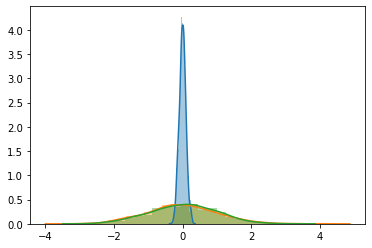

In [10]:
trace = plot_distributions(0.1,0.1, N_CLIENTS=1000)
sns.distplot(trace['V_i'])
sns.distplot(trace['v_i'][:,0])
sns.distplot(trace['v_i'][:,1])

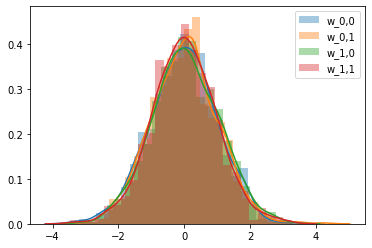

In [13]:
for i in range(2):
    for j in range(2):
        sns.distplot(trace['W_i'][:, i, j], label='w_{},{}'.format(i,j))
plt.legend()

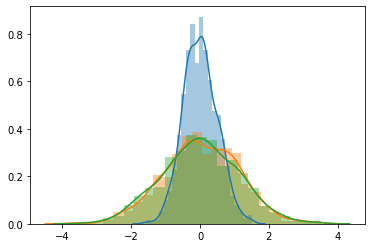

In [14]:
trace = plot_distributions(0.5,0.5, N_CLIENTS=1000)
sns.distplot(trace['V_i'])
sns.distplot(trace['v_i'][:,0])
sns.distplot(trace['v_i'][:,1])

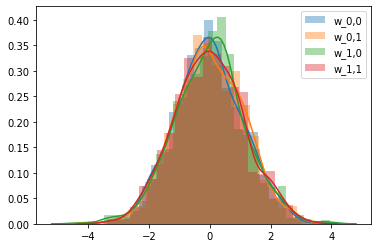

In [15]:
for i in range(2):
    for j in range(2):
        sns.distplot(trace['W_i'][:, i, j], label='w_{},{}'.format(i,j))
plt.legend()

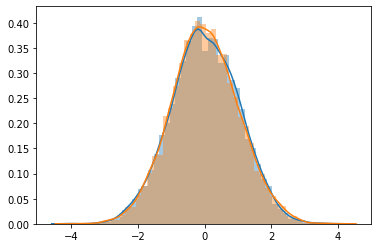

In [38]:
trace = plot_distributions(0.1,0.1, N_CLIENTS=10000)
sns.distplot(trace['v_0'])
sns.distplot(trace['v_1'])

In [127]:
np.mean(trace['v_i'][:, 0]), np.std(trace['v_i'][:, 0])

(-0.002578931093760175, 0.9933323898733004)

In [128]:
np.mean(trace['v_i'][:, 1]), np.std(trace['v_i'][:, 1])

(-0.007948061415619712, 1.0042777136953938)

In [129]:
trace = plot_distributions(0.5,0.5, N_CLIENTS=10000)

In [130]:
np.mean(trace['v_i'][:, 0]), np.std(trace['v_i'][:, 0])

(0.01201228998853565, 1.1213560578363777)

In [131]:
np.mean(trace['v_i'][:, 1]), np.std(trace['v_i'][:, 1])

(0.005111093029513872, 1.1235148145300935)

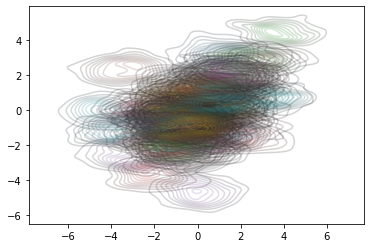

In [88]:
trace = plot_distributions(1,1, N_CLIENTS=100)
for i in range(100):
    sns.kdeplot(trace['X_i0'][i],trace['X_i1'][i],alpha=0.2)

In [14]:
_ = plot_distributions(0.5,0.5)

AttributeError: 'int' object has no attribute 'copy'

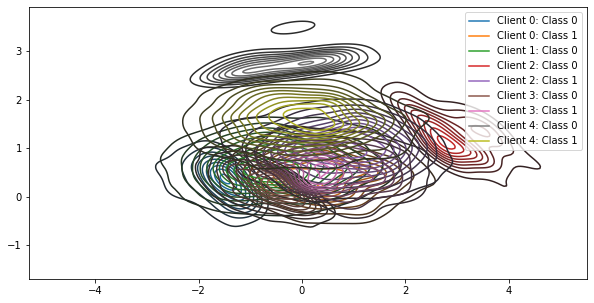

In [825]:
_ = plot_distributions(1, 1)

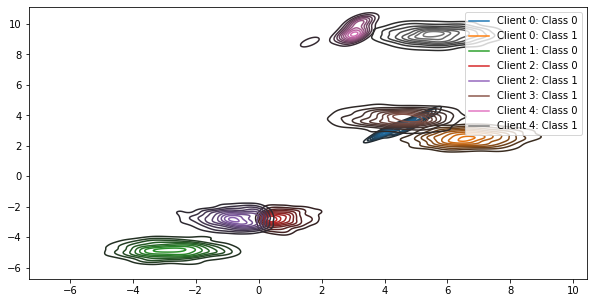

In [826]:
_ = plot_distributions(5,5)